# Exploratory Data Analysis and Feature Engineering

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv("cleantrain.csv")
test = pd.read_csv("cleantest.csv")
df = [train, test]
sns.set_style("darkgrid")
sns.set_palette("pastel")

In [4]:
train.head(3)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282


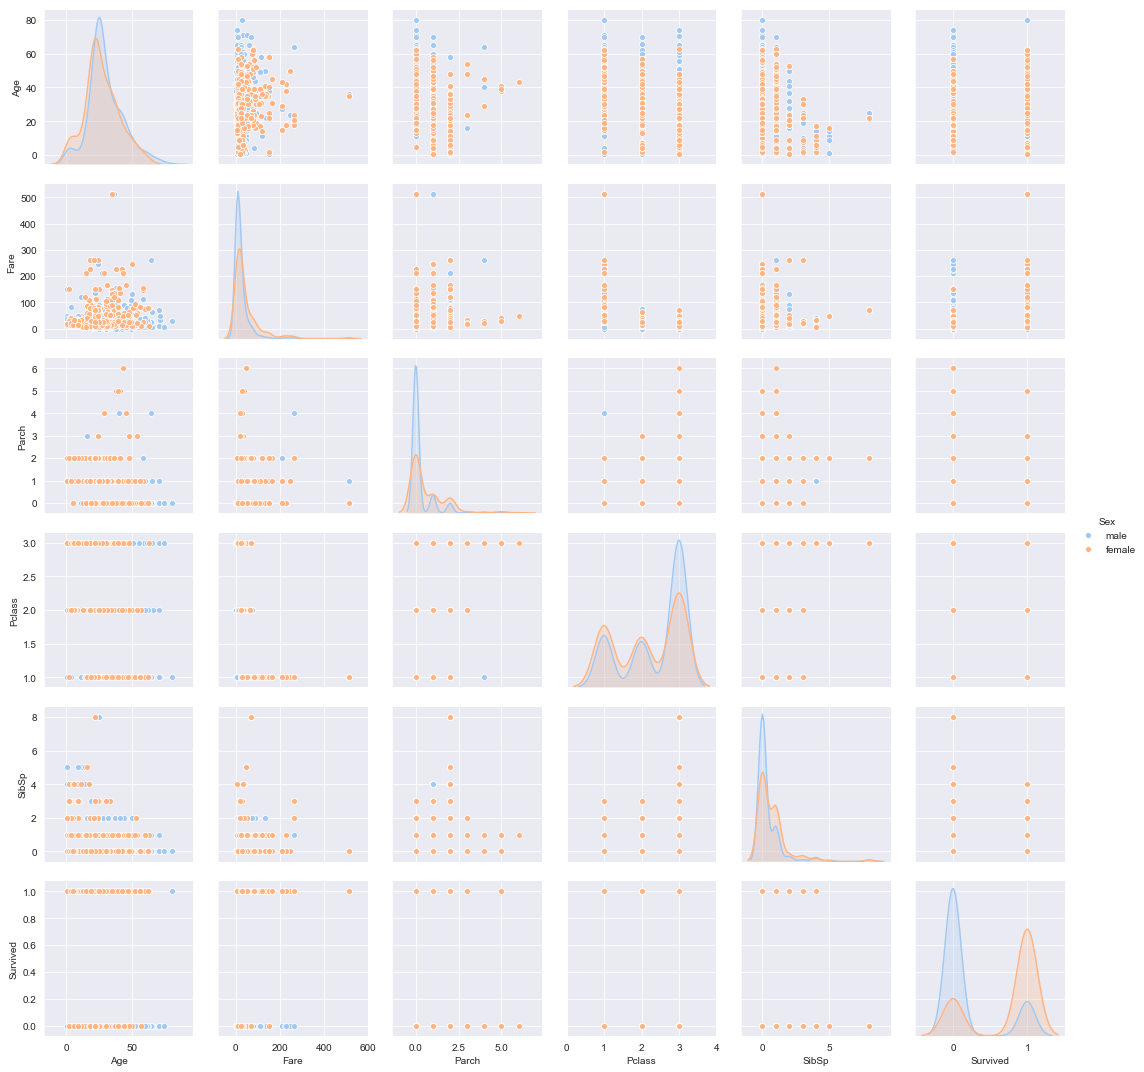

In [5]:
#drop non-numerical columns
sns.pairplot(train.drop(["Ticket","Cabin","PassengerId","Embarked","Name"],axis=1),hue="Sex")

Text(0.5, 1.0, 'Count of deaths and survival by Pclass')

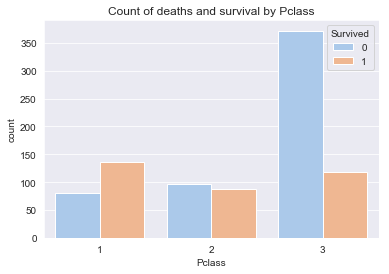

In [6]:
sns.countplot(x="Pclass",data=train,hue="Survived")
plt.title("Count of deaths and survival by Pclass")

Dark color represents males. Light color represents females.


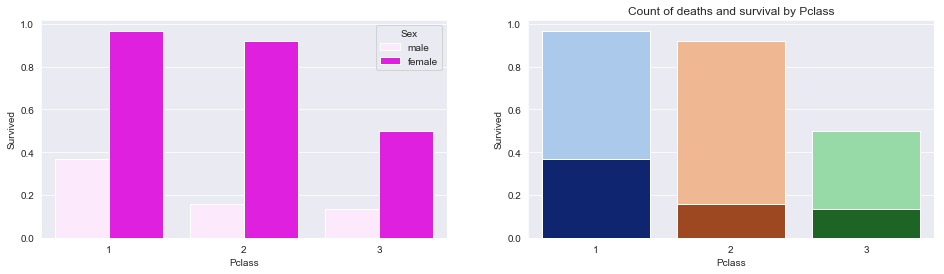

In [7]:
fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.barplot(x="Pclass",y="Survived",data=train,hue="Sex",ci=None,ax=ax[0],color="magenta")
sns.barplot(x="Pclass",y="Survived",data=train[train["Sex"]=="female"],ci=None,ax=ax[1])
sns.barplot(x="Pclass",y="Survived",data=train[train["Sex"] == "male"],palette="dark",ci=None,ax=ax[1])
plt.title("Count of deaths and survival by Pclass")
print("Dark color represents males. Light color represents females.")

We can see that women from Pclass = 3 were more likely to survive than Pclass = 1 men. Thus, we can infer that Sex had a larger importance for survivability than Pclass.

Text(0.5, 1.0, 'Number of relatives each passenger had aboard')

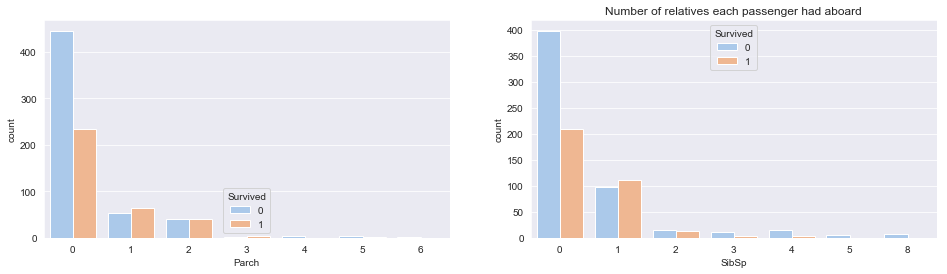

In [8]:
fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.countplot(x="Parch",data=train,ax=ax[0],hue="Survived")
sns.countplot(x="SibSp",data=train,ax=ax[1],hue="Survived")
plt.title("Number of relatives each passenger had aboard")

Shape of both plots looks similar, but don't tell us too much. Let's engineer our first feature: combine SibSp (Siblings+Spouse) with Parch (Parents+Children)

Text(0.5, 1.0, 'Family Size abord for each passenger')

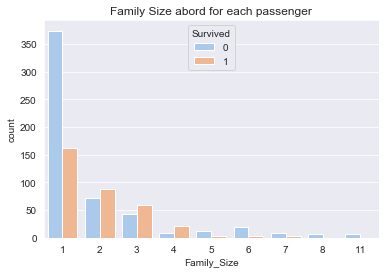

In [9]:
for dataset in df:
    dataset["Family_Size"] = dataset[["SibSp","Parch"]].apply(lambda person: person[0] + person[1] + 1,axis=1)

sns.countplot(x="Family_Size",data=train,hue="Survived")
plt.title("Family Size abord for each passenger")

If we just look the chart quickly, we can misinterpret it. Although there are more alone survivals than accompanied, we can see that for Family_Size of 2, 3 and 4, more people survived than not. We can try to categorize it later and see what works better.

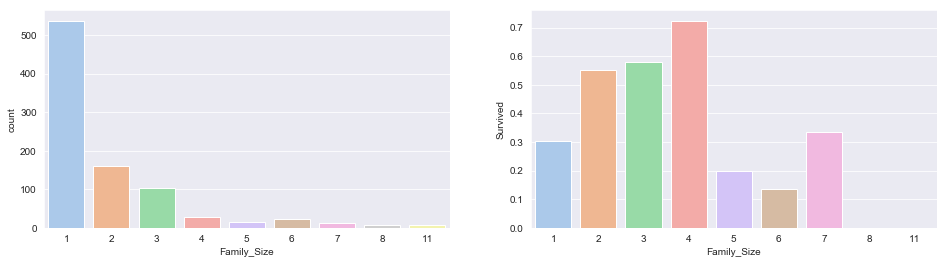

In [10]:
fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.countplot(x="Family_Size",data=train,ax=ax[0])
sns.barplot(x="Family_Size",y="Survived",data=train,ci=None,ax=ax[1])

## Dividing Age Distribution into Bins

Text(0.5, 1.0, 'Age Distribution')

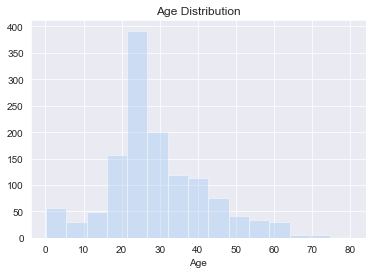

In [11]:
sns.distplot(pd.concat([train,test],axis=0)["Age"],kde=False,bins=15)
plt.title("Age Distribution")

Using pd.qcut()


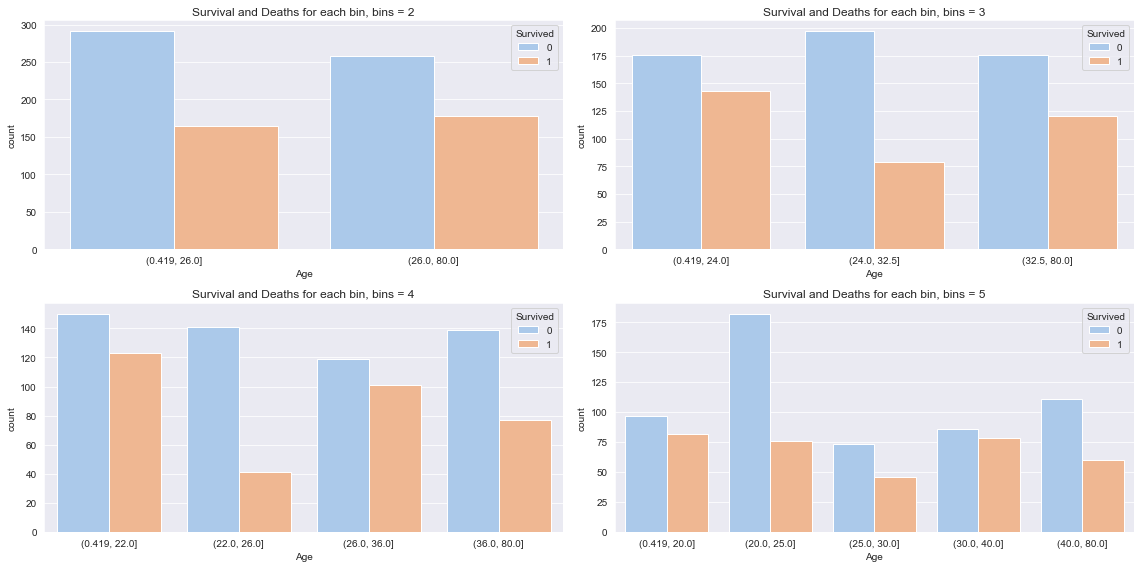

In [12]:
fig, ax = plt.subplots(2,2,figsize=(16,8))
#plt.title("Count of deaths and survival by Pclass",)
ax = ax.flatten()
for i in range(4):
    data = pd.DataFrame(pd.qcut(train["Age"],i+2))
    p = pd.concat([pd.DataFrame(train["Survived"]),data],axis=1)
    sns.countplot(x="Age",data=p,hue="Survived",ax=ax[i])
    ax[i].set_title("Survival and Deaths for each bin, bins = {}".format(i+2))

plt.tight_layout()
print("Using pd.qcut()")

Using pd.cut()


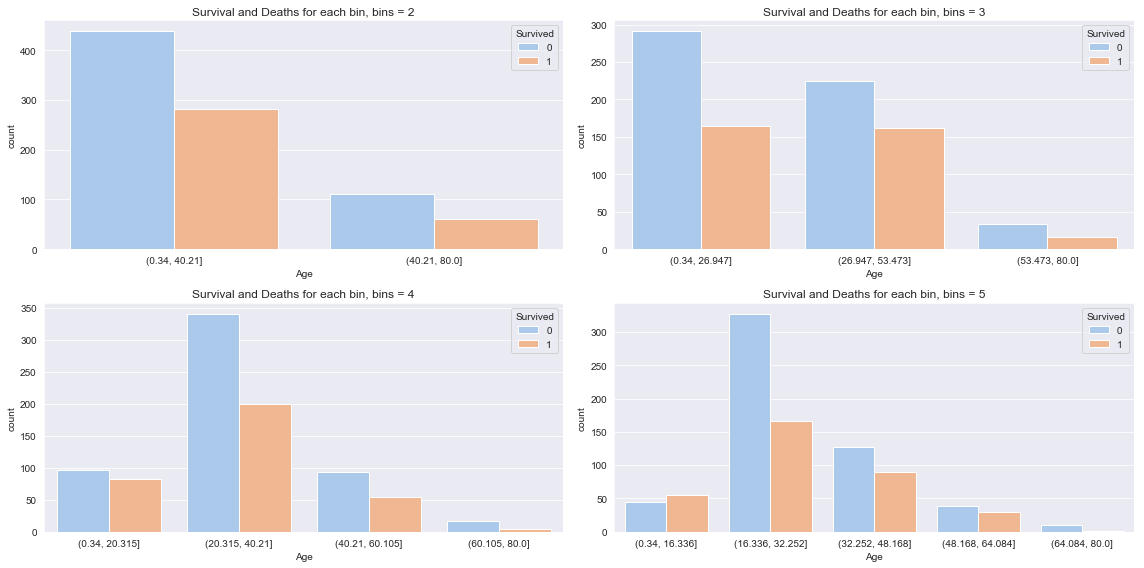

In [13]:
fig, ax = plt.subplots(2,2,figsize=(16,8))
ax = ax.flatten()
for i in range(4):
    data = pd.DataFrame(pd.cut(train["Age"],i+2))
    p = pd.concat([pd.DataFrame(train["Survived"]),data],axis=1)
    sns.countplot(x="Age",data=p,hue="Survived",ax=ax[i])
    ax[i].set_title("Survival and Deaths for each bin, bins = {}".format(i+2))

plt.tight_layout()
print("Using pd.cut()")

I'm not sure which division will work the best, but my feeling tells that qcut with 5 bins is a reasonable choice.

In [14]:
for dataset in df:
    dataset["Age_Bin"] = pd.qcut(dataset["Age"],5)

* Edit Feb 6th 2019: I'll use 'Age' as a continuous value instead of bins. It led to better results.

## Dividing Fare Distribution into Bins

Text(0.5, 1.0, 'Fare Distribution')

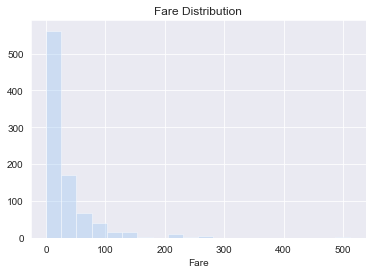

In [15]:
sns.distplot(train["Fare"],kde=False,bins=20)
plt.title("Fare Distribution")

Let's use the same approach with the Fares. I'll only check for the qcut, as it makes more sense in this case.

Using pd.qcut()


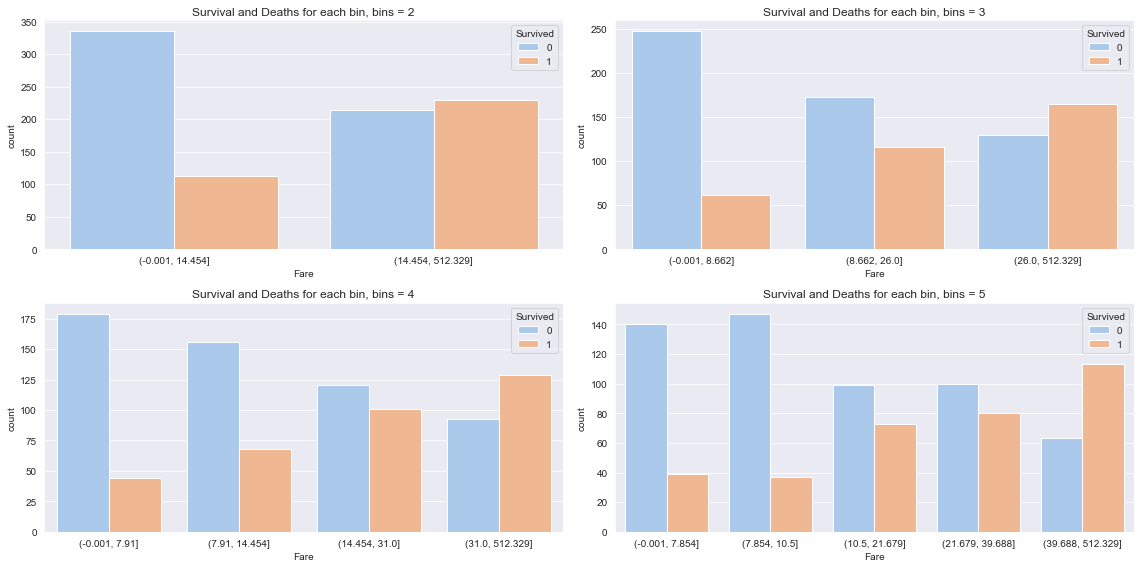

In [16]:
fig, ax = plt.subplots(2,2,figsize=(16,8))
ax = ax.flatten()
for i in range(4):
    data = pd.DataFrame(pd.qcut(train["Fare"],i+2))
    p = pd.concat([pd.DataFrame(train["Survived"]),data],axis=1)
    sns.countplot(x="Fare",data=p,hue="Survived",ax=ax[i])
    ax[i].set_title("Survival and Deaths for each bin, bins = {}".format(i+2))

plt.tight_layout()
print("Using pd.qcut()")

For the fares, I'll stick with bins = 4.

In [17]:
for dataset in df:
    dataset["Fare_Bin"] = pd.qcut(dataset["Fare"],4)

* Edit Feb 6th 2019: I'll use 'Fare' as a continuous value instead of bins. It led to better results.

In [18]:
train.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Age_Bin,Fare_Bin
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,2,"(20.0, 25.0]","(-0.001, 7.91]"
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,2,"(30.0, 40.0]","(31.0, 512.329]"
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,1,"(25.0, 30.0]","(7.91, 14.454]"
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,2,"(30.0, 40.0]","(31.0, 512.329]"
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,1,"(30.0, 40.0]","(7.91, 14.454]"


## Cabin Extraction
Cabin is the column with the most missing values. However, we can try to separate between Deck (first letter of Cabin) or, more simplistic, w/ presence or absence of data. Let's do the former.

In [19]:
for dataset in df:
    dataset["Cabin_Code"] = dataset["Cabin"].apply(lambda cabin: "U" if pd.isnull(cabin) else cabin[0])

In [20]:
train.head(3)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Age_Bin,Fare_Bin,Cabin_Code
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,2,"(20.0, 25.0]","(-0.001, 7.91]",U
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,2,"(30.0, 40.0]","(31.0, 512.329]",C
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,1,"(25.0, 30.0]","(7.91, 14.454]",U


## Title Name Extraction
There are a lot of information in the name column. We can try to find similar surnames (grouping families) for instance. I'll this in another time. For now, my goal is to extract the titles (Mr., Mrs. etc.)

In [21]:
titles = []
for df in [train,test]:
    for name in df["Name"]:
        title = name.split(",")[1].split(".")[0].lstrip()
        if title not in titles:
            titles.append(title)
print("Titles found: {}".format(', '.join(titles)))

Titles found: Mr, Mrs, Miss, Master, Don, Rev, Dr, Mme, Ms, Major, Lady, Sir, Mlle, Col, Capt, the Countess, Jonkheer, Dona


In [22]:
#Dummying a column just to check number of appearences of each title
for df in [train,test]:
    df["Title"] = df["Name"].apply(lambda x: x.split(",")[1].split(".")[0].lstrip())

print("Number of appearences of each title:")
print(train["Title"].value_counts())
print(test["Title"].value_counts())

Number of appearences of each title:
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Sir               1
Mme               1
Jonkheer          1
Don               1
Lady              1
Capt              1
Ms                1
Name: Title, dtype: int64
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64


Let's keep Mr, Miss, Mrs and Master and switch the other titles with "Other"

In [23]:
for df in [train,test]:
    df["Title"] = df["Title"].apply(lambda title: title if title in ["Mr","Miss","Mrs","Master"] else "Other")

In [24]:
print("Number of appearences of each title:")
print(train["Title"].value_counts()+test["Title"].value_counts())

Number of appearences of each title:
Mr        757
Miss      260
Mrs       197
Master     61
Other      34
Name: Title, dtype: int64


In [25]:
train.sample(3)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Age_Bin,Fare_Bin,Cabin_Code,Title
812,35.0,NaN,S,10.5,"Slemen, Mr. Richard James",0,813,2,male,0,0,28206,1,"(30.0, 40.0]","(7.91, 14.454]",U,Mr
133,29.0,NaN,S,26.0,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",0,134,2,female,1,1,228414,2,"(25.0, 30.0]","(14.454, 31.0]",U,Mrs
66,29.0,F33,S,10.5,"Nye, Mrs. (Elizabeth Ramell)",0,67,2,female,0,1,C.A. 29395,1,"(25.0, 30.0]","(7.91, 14.454]",F,Mrs


In [26]:
train.to_csv("new_cats_train.csv")
test.to_csv("new_cats_test.csv")